In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
from matplotlib.colors import LogNorm

import timeit
import Double_Null_utils as dnu
from scipy import optimize
import tables
import h5py



#import warnings
#warnings.filterwarnings("ignore")

start = timeit.default_timer()

/home/brandon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
uscal=1
vscal=1

In [3]:
rnputil=np.load('rnputil.npy')
wHD=rnputil[8]
print(wHD)

if wHD==True or wHD==1.0:
    urange=np.load('urange.npy')[::uscal]
    vrange=np.load('vrange.npy')[::vscal]
if wHD==False or wHD==0.0 or wHD==None:
    urange=np.load('urange.npy')
    vrange=np.load('vrange.npy')


1.0


In [4]:
Elist=[]

funcchoice='sig'

if funcchoice=='r':
    if wHD==True or wHD==1.0:
        with h5py.File('rnp.h5','r') as f:
            r_group_key = list(f.keys())[0]
            rnpi=f[r_group_key]
            rnp = np.asarray(rnpi[::uscal,::vscal])
            print(len(rnp),len(rnp[1,:]))
            Elist.append(1)
        try:
            with h5py.File('rnp2.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp2 = np.asarray(rnpi[::uscal,::vscal])
        
            kval=int(len(rnp2)/len(rnp))
            Elist.append(kval)
            rnp2= np.asarray(rnp2[::kval,::kval])
            rnp2=rnp2[:-1]
            print(len(rnp2),len(rnp2[1,:]))
        except:
            pass
        try:
            with h5py.File('rnp3.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp3 = np.asarray(rnpi[::uscal,::vscal])
        
            kval=int(len(rnp3)/len(rnp))
            Elist.append(kval)
            rnp3= np.asarray(rnp3[::kval,::kval])
            rnp3=rnp3[:-1]
            print(len(rnp3),len(rnp3[1,:]))
        except:
            pass
        try:
            with h5py.File('rnp4.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp4 = np.asarray(rnpi[::uscal,::vscal])
        
            kval=int(len(rnp4)/len(rnp))
            Elist.append(kval)
            rnp4= np.asarray(rnp4[::kval,::kval])
            #rnp4=rnp4[:-1]
            print(len(rnp4),len(rnp4[1,:]))
        except:
            pass
    
if funcchoice=='sig':
    if wHD==True or wHD==1.0:
        with h5py.File('signp.h5','r') as f:
            r_group_key = list(f.keys())[0]
            rnpi=f[r_group_key]
            rnp = np.asarray(rnpi[::uscal,::vscal])
            print(len(rnp),len(rnp[1,:]))
            Elist.append(1)
        try:
            with h5py.File('signp2.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp2 = np.asarray(rnpi[::uscal,::vscal])
        
            kval=int(len(rnp2)/len(rnp))
            Elist.append(kval)
            rnp2= np.asarray(rnp2[::kval,::kval])
            rnp2=rnp2[:-1]
            print(len(rnp2),len(rnp2[1,:]))
        except:
            pass
        try:
            with h5py.File('signp3.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp3 = np.asarray(rnpi[::uscal,::vscal])
        
            kval=int(len(rnp3)/len(rnp))
            Elist.append(kval)
            rnp3= np.asarray(rnp3[::kval,::kval])
            rnp3=rnp3[:-1]
            print(len(rnp3),len(rnp3[1,:]))
        except:
            pass
        try:
            with h5py.File('signp4.h5','r') as f:
                r_group_key = list(f.keys())[0]
                rnpi=f[r_group_key]
                rnp4 = np.asarray(rnpi[::uscal,::vscal])
        
            kval=int(len(rnp4)/len(rnp))
            Elist.append(kval)
            rnp4= np.asarray(rnp4[::kval,::kval])
            #rnp4=rnp4[:-1]
            print(len(rnp4),len(rnp4[1,:]))
        except:
            pass    
    
    
    print(str(rnp.nbytes)+" bytes")
    print("Hd5 files used")

if wHD==False or wHD==0.0 or wHD==None:
    rnp=np.load('rnp.npy')
    rnp2=np.load('rnp2.npy')
    rnp3=np.load('rnp3.npy')
    rnp4=np.load('rnp4.npy')
    
    
    print("Numpy arrays used")

switchax=float(rnputil[9])
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    rnp2=np.swapaxes(rnp2,0,1)
    rnp3=np.swapaxes(rnp3,0,1)
    rnp4=np.swapaxes(rnp4,0,1)

print(len(rnp),len(rnp2),len(rnp3),len(rnp4))    
    
if len(rnp)==len(urange):
    pass
else:
    print(len(rnp),len(urange),len(vrange))
    kval=int(len(urange)/len(rnp))
    print(kval)
    urange=urange[::kval]
    vrange=vrange[::kval]
#urange=urange[:-1]
    
print(len(urange),len(vrange))


25 25
25 25
25 25
25 25
5000 bytes
Hd5 files used
25 25 25 25
25 25


In [5]:
print(rnputil)

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)


dv0=vrange[1]-vrange[0]

def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.687,1.3,50.0],args=(M0,Q,Lambda), method='hybr')
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
    
numpoints=Nu*Nv
print(str(numpoints)+" points")

if Q==0.0:
    predtime=numpoints/(144935)
if Q>0.0:
    predtime=numpoints/(259000)
print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")

print(Nu,Nv)

[6.25000000e+02 2.50000000e+01 2.50000000e+01 5.00000000e+00
 4.24066667e-01 1.00000000e+00 9.50000000e-01 0.00000000e+00
 1.00000000e+00 0.00000000e+00]
625 points
Runtime: about 0.00 minutes
25 25


In [6]:
uloc=[1/3,2/3]
ind=0.0
rnpf=np.asarray([rnp]).reshape((len(urange),len(vrange),1))
print(rnpf[1,1,0])
try:
    rnpf=np.append(rnpf,rnp2.reshape((len(urange),len(vrange),1)),axis=2)
except:
    pass
try:
    rnpf=np.append(rnpf,rnp3.reshape((len(urange),len(vrange),1)),axis=2)
except:
    pass
try:
    rnpf=np.append(rnpf,rnp4.reshape((len(urange),len(vrange),1)),axis=2)
except:
    pass
#print(rnpf)
#print(rnpf[1,1])
print(rnpf[1,1,:])

#rnpf=np.asarray(rnp)

0.00023287576652512325
[0.00023288 0.00023285 0.00023284 0.00023284]


In [7]:


Errornp0=np.zeros((Nu*Elist[0],Nv*Elist[0]))
Errornp=np.zeros((len(Elist)-1,Nu,Nv))*np.nan
Errorunp=np.zeros((len(Elist)-1,len(uloc),Nv))*np.nan

#print(Errornp0)
for i in range(0,Nu*Elist[0]):
    for j in range(0,Nv*Elist[0]):
        Errornp0[i][j]=np.abs((rnpf[i][j][1]-rnpf[i][j][0])/rnpf[i][j][1])

for k in range(0,len(Elist)-1):
    for i in range(0,Nu):
        for j in range(0,Nv):
            Errornp[k][i][j]=abs((rnpf[i][j][k+1]-rnpf[i][j][k])/rnpf[i][j][k+1])

        
            
for k in range(0,len(Elist)-1):        
    for l in range(0,len(uloc)):
        for j in range(0,Nv):
            Errorunp[k][l][j]=Errornp[k][int(uloc[l]/umax*Nu)][j]
            

/home/brandon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/brandon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


/home/brandon/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)
/home/brandon/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


25


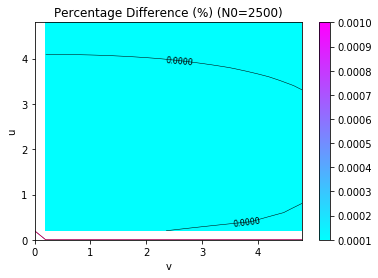

In [8]:
Errornpm=np.ma.masked_invalid(Errornp[-1,:,:])
print(len(Errornpm))
levelserror=[.00001]#,.0001,.001,.01,.1]

plot1=plt.pcolormesh(vrange,urange,Errornpm,cmap=plt.cm.cool,vmin=0.0001,vmax=.001)#np.nanmax(Errornp))
plot4=plt.contour(vrange,urange,Errornpm, levelserror,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plt.clabel(plot4, levelserror, inline=0, inline_spacing=0, fmt='%1.4f',rightside_up=True, fontsize=8)
    
plot5=plt.contour(vrange,urange,rnp, [rminus],linewidths=0.6,colors='blue',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot6=plt.contour(vrange,urange,rnp, [rplus],linewidths=0.6,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
#sample3=plt.plot(vrange[-1],drdvnplistscal)

plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,vmax)
plt.xlim(0,vmax)
plt.ylim(0,umax)
#plt.ylim(0,np.nanmax(urange[-1]))
plt.colorbar(plot1)
plt.title('Percentage Difference (%) (N0='+str(N*Elist[-2])+')')
#plt.grid()
#plt.savefig('Test1-3.png',dpi=300)
plt.show()

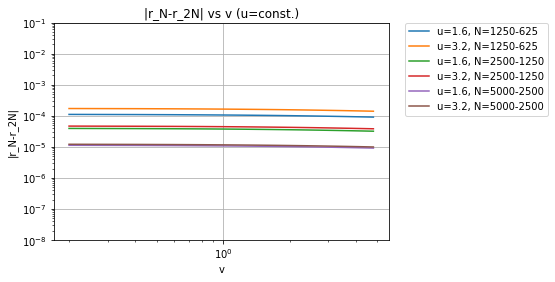

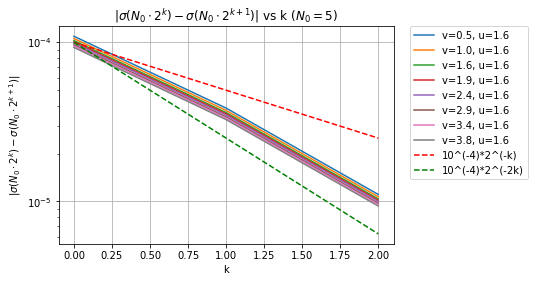

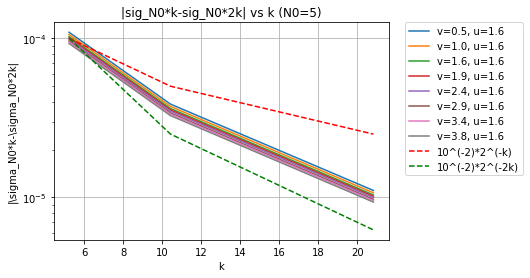

[[1.09171664e-04 3.85931255e-05 1.10610112e-05]
 [1.05658311e-04 3.73252339e-05 1.06953384e-05]
 [1.02503201e-04 3.61869793e-05 1.03670849e-05]
 [1.00581397e-04 3.54934630e-05 1.01670695e-05]
 [9.87931309e-05 3.48477728e-05 9.98081597e-06]
 [9.63403931e-05 3.39612059e-05 9.72499739e-06]
 [9.48454261e-05 3.34200528e-05 9.56878021e-06]
 [9.27929067e-05 3.26757348e-05 9.35379879e-06]]


In [20]:
N0=int(len(rnp)/umax)

for k in range(0,len(Elist)-1):
    for j in range(0,len(uloc)):
        plot=plt.plot(vrange, Errorunp[k][j][:], label='u='+str(round(uloc[j]*umax,1))+', N='+str(N*Elist[k+1])+"-"+str(N*Elist[k]))
plt.xlabel('v')
plt.ylabel('|r_N-r_2N|')
plt.legend()
plt.grid()
plt.title('|r_N-r_2N| vs v (u=const.)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.ylim(10**(-8),10**(-1))
#plt.xlim(0,10)
#plt.savefig('Error.png',dpi=300,bbox_inches="tight")
plt.show()

vloc=[3/30,6/30,10/30,12/30,15/30,18/30,21/30,24/30]
klist=np.zeros((len(vloc),len(Elist)-1))*np.nan

for j in range(0,len(vloc)):
    for k in range(0,len(Elist)-1):
        klist[j][k]=Errorunp[k][0][int(vloc[j]*Nv)]#*Elist[k])]
        
simlist=range(0,len(Elist)-1)
#klist=np.array([Errorunp[0][0][int(1/2*Nv*Elist[0])],Errorunp[1][0][int(1/2*Nv*Elist[1])],Errorunp[2][0][int(1/2*Nv*Elist[2])],Errorunp[3][0][int(1/2*Nv*Elist[3])]])
sample=np.zeros((len(Elist)-1))*np.nan
sample2=np.zeros((len(Elist)-1))*np.nan
sample3=np.zeros((len(Elist)-1))*np.nan
for k in range(0,len(Elist)-1):
    sample[k]=10**(-4)*2**(-1*simlist[k])
    #sample2[k]=10**(-3)*2**(-1*simlist[k])
    sample3[k]=10**(-4)*2**(-2*simlist[k])

for j in range(0,len(vloc)):
    plot=plt.plot(simlist,klist[j][:],label='v='+str(round(vloc[j]*vmax,1))+", u="+str(round(uloc[0]*umax,1)))
plt.plot(simlist,sample,'r--',label='10^(-4)*2^(-k)')
#plt.plot(simlist,sample2,'b--',label='10^(-3)*2^(-1k)')
plt.plot(simlist,sample3,'g--',label='10^(-4)*2^(-2k)')
plt.title(r'$|\sigma (N_0 \cdot 2^k)-\sigma (N_0 \cdot 2^{k+1})|$' ' vs k ' r'$(N_0=$'+str(N0)+')')
plt.xlabel('k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xlim(1,10)
#plt.ylim(10**(-10),10**(-1))
plt.ylabel(r'$|\sigma (N_0 \cdot 2^k)-\sigma (N_0 \cdot 2^{k+1})|$')
#plt.xscale('log')
plt.yscale('log')
plt.grid()
#plt.savefig('ConTest-2ndorder-sig.png',dpi=300,bbox_inches="tight")
plt.show()

simlist=np.asarray(simlist)
simlist=2**(simlist)*Nu/umax

for j in range(0,len(vloc)):
    plot=plt.plot(simlist,klist[j][:],label='v='+str(round(vloc[j]*vmax,1))+", u="+str(round(uloc[0]*umax,1)))
plt.plot(simlist,sample,'r--',label='10^(-2)*2^(-k)')
#plt.plot(simlist,sample2,'b--',label='10^(-3)*2^(-1k)')
plt.plot(simlist,sample3,'g--',label='10^(-2)*2^(-2k)')
plt.title('|sig_N0*k-sig_N0*2k| vs k (N0='+str(N0)+')')
plt.xlabel('k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xlim(1,10)
#plt.ylim(10**(-10),10**(-1))
plt.ylabel('|\sigma_N0*k-\sigma_N0*2k|')
#plt.xscale('log')
plt.yscale('log')
plt.grid()
#plt.savefig('ConTest-2ndorder-sig.png',dpi=300,bbox_inches="tight")
plt.show()
    
print(klist)


In [15]:
Error1list=[]
thrhold=0.01
for j in range(0,Nv*Elist[-1]):
    for i in range(0,Nu*Elist[-1]):
        if Errornp[-1][i][j]>thrhold:
            Error1list.append(rnpf[i][j][-2])
            break
        elif i==Nu*Elist[-1]-1:
            Error1list.append(np.nan)
#print(Error1list)
plot=plt.plot(2*vrange[-1], Error1list,label=str(thrhold*100.0)+'%')
sample3=plt.plot(vrange0,rminuslist,'r--',color='blue',label='r-')
sample4=plt.plot(vrange0,rpluslist,'r--',color='red',label='r+')
plt.xlabel('v')
plt.ylabel('r')
plt.legend()
plt.grid()
plt.title('Last r(u,v) Before Error vs v (u=const.)')
    
#plt.tight_layout()
plt.yscale('log')
#plt.xscale('log')
plt.ylim(10**(-1),10**(2))
plt.xlim(0,35)
#plt.savefig('Error3.png',dpi=300,bbox_inches="tight")
plt.show()
        

IndexError: index 25 is out of bounds for axis 0 with size 25